In [1]:
library(forecast)
library(tseries)
library(lmtest)
library(Hmisc)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



In [2]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [3]:
library(forecastxgb)

Loading required package: xgboost


In [4]:
data <- read.csv("/Users/semenfedotov/Desktop/GitHub//ML_MIPT_PART_2/HW3/train.csv", 
                 sep=",", stringsAsFactors=F, dec=".")
data <- head(data, -1)

In [5]:
data$Value <- as.numeric(data$ACTUAL)
data$Date <- as.Date(data$Date, format='%d.%m.%Y')
data$Temp <- as.numeric(data$Temp)
tSeries <- ts(data = data$Value, start=c(year(data$Date[1]), yday(data$Date[1])), freq = 365.25)

In [6]:
head(data)

ID,Date,tsID,ACTUAL,Temp,Saturday,Sunday,Value
1,2010-01-01,4,35489.95,-0.9,0,1,35489.95
2,2010-01-02,4,35413.59,-0.1,1,0,35413.59
3,2010-01-03,4,34802.67,-3.9,0,1,34802.67
4,2010-01-04,4,36003.84,-13.7,0,1,36003.84
5,2010-01-05,4,37622.96,-16.9,0,1,37622.96
6,2010-01-06,4,38248.29,-16.3,0,1,38248.29


In [6]:
na.omit

function (object, ...) 
UseMethod("na.omit")
<bytecode: 0x7ffe09574318>
<environment: namespace:stats>

In [7]:
length(na.omit(trainSeries))

ERROR: Error in na.omit(trainSeries): объект 'trainSeries' не найден


In [138]:
c(head(chitiri$Temp, 1000))

[1]  -0.9  -0.1  -3.9 -13.7 -16.9 -16.3 -17.5 -13.2  -6.0  -7.8 -14.5 -12.2
  [13]  -9.6 -10.9 -17.0 -19.6 -20.6 -20.3 -22.0 -21.0 -22.0 -22.6 -26.1 -22.9
  [25] -17.0 -11.5 -14.3 -18.6 -20.6 -13.6  -7.4  -6.6  -9.1 -10.0 -15.4 -16.0
  [37] -15.3 -17.2 -17.9 -15.8 -19.1 -21.0 -20.0 -18.5 -13.8  -7.6  -6.1  -7.8
  [49] -14.6 -11.4  -6.5  -0.9  -1.3  -4.5  -7.7  -7.3  -3.8  -8.9 -12.2 -12.4
  [61]  -8.9  -3.4  -3.9  -6.3  -9.3  -6.6  -7.0 -11.9 -11.7  -8.2  -7.5  -1.8
  [73]  -1.9  -3.7  -4.3  -7.8 -10.7 -12.3  -4.9   2.4   2.6  -0.3  -1.7  -0.5
  [85]  -2.9  -2.5  -0.2   0.8   3.9   4.1   3.6   3.4   2.9   3.1   4.7   6.6
  [97]   4.7   2.8   4.8   3.8   5.6   5.9   6.9   6.8   7.7  10.4   9.4  10.6
 [109]  11.8  13.3  14.2  16.4  11.8   9.6  10.6   7.6   4.4   6.7  12.0  12.3
 [121]  14.8  16.0  16.3  18.4  21.0  21.5  22.3  22.3  22.0  20.5  19.6  18.3
 [133]  16.8  17.0  19.2  19.3  20.9  22.3  18.9  15.8  14.2  14.9  16.7  19.1
 [145]  18.3  16.9  13.5  15.5  16.4  16.5  19.0  20.9  23.2  24.7  26.2  24.5
 [157]  18.1  17.3  20.9  23.1  22.9  19.4  24.6  29.2  27.2  24.3  25.6  22.6
 [169]  18.3  18.7  19.6  21.9  24.1  24.8  25.7  27.1  29.3  30.3  30.3  30.5
 [181]  27.1  22.9  24.4  26.7  27.2  24.7  26.6  25.4  25.8  27.4  29.1  30.4
 [193]  30.0  27.1  23.1  22.3  25.8  28.7  30.4  26.2  25.0  25.9  27.6  29.2
 [205]  30.4  30.6  30.7  31.5  32.8  31.8  31.2  31.5  32.0  32.2  32.3  32.4
 [217]  30.3  31.0  30.1  30.3  30.5  29.5  31.0  30.8  30.4  29.2  25.0  22.8
 [229]  25.7  25.7  25.7  21.9  15.3  14.6  20.9  25.2  27.3  24.4  20.2  21.4
 [241]  26.1  22.7  18.7  18.3  26.9  22.9  18.8  20.1  18.3  12.4   9.0  12.8
 [253]  14.6  14.1  16.9  17.4  14.8  14.3  17.2  17.4  18.8  18.7  19.4  19.5
 [265]  20.5  13.9  10.9  12.9  14.0  16.5  17.2  17.9  10.7   5.3   5.6   5.2
 [277]   2.5   2.6   3.6   5.1   6.9   8.0  10.1  10.4   7.1   4.4   2.6   4.0
 [289]   5.7   2.9   2.1   3.8   2.3   6.3   7.0   5.3   5.1   4.1   5.2   5.5
 [301]   6.0   0.9   0.7   3.2   2.5   4.6   4.5   6.5   7.9   4.8   4.9   3.7
 [313]   4.1   5.4   5.9   7.6   8.5   9.9  10.5  10.6   5.5   3.1   0.6   2.2
 [325]   1.5   1.4   3.2   1.7   5.9   3.8   2.2   1.3  -3.4   0.9  -9.3 -16.6
 [337] -13.9  -5.7   0.8   0.4  -3.0  -2.8   0.0  -0.2  -0.4  -1.6  -3.5  -3.0
 [349]  -2.1  -2.3  -3.5  -4.0  -5.3  -4.7  -4.4  -0.5  -0.5  -2.1   0.7   2.7
 [361]   3.3   1.6   1.6   2.4  -1.4  -4.4  -3.4  -1.8  -5.5  -7.8 -10.4 -11.1
 [373] -12.7 -13.5 -14.5 -14.1 -11.3 -12.1  -6.7  -4.8  -5.8  -8.9 -11.6 -14.7
 [385] -18.3 -16.3 -18.7 -14.2  -6.7  -6.8  -8.2 -10.8 -11.4  -9.2  -7.5  -7.4
 [397]  -9.5 -14.8 -14.0  -9.1  -3.9  -2.2  -3.4  -5.1  -3.9  -7.1 -16.3 -12.6
 [409]  -7.5 -14.7 -18.8 -22.3 -22.9 -22.9 -22.3 -22.3 -23.6 -23.1 -21.7 -21.5
 [421] -21.2 -19.4 -18.4 -17.9 -17.3 -15.3 -15.8 -15.0  -6.4  -3.4  -7.1  -7.9
 [433] -11.0 -11.1 -11.3 -10.0  -6.2  -4.3  -1.5  -0.3  -4.2  -6.0  -5.7  -3.6
 [445]  -2.1  -0.8  -1.8   0.2  -3.0  -4.1  -6.0  -5.8  -4.8   0.7   1.0  -2.1
 [457]  -2.7   0.8   2.5   2.9   4.8   5.0   4.6   6.1   5.2   5.0   5.1   5.5
 [469]   6.9   6.0   7.4   5.4   8.1   7.0   5.1   4.2   6.9   9.8  11.1  12.5
 [481]  11.3  10.0  12.8  15.8  15.8  14.3  14.0  14.3  14.5  16.1  17.8  15.5
 [493]  15.2  15.7  15.9  16.2  13.5  13.1  13.7  14.6  15.2  16.4  18.3  19.4
 [505]  17.8  19.1  21.6  21.7  19.1  19.5  18.9  14.3  13.8  15.4  19.8  23.5
 [517]  19.5  19.3  21.6  18.2  14.6  19.1  17.2  14.6  14.4  15.2  17.4  19.4
 [529]  17.6  18.4  22.1  20.8  21.1  19.3  21.8  25.5  22.4  17.6  17.2  19.1
 [541]  20.1  21.4  21.5  23.1  25.1  25.9  25.3  26.1  26.4  25.8  26.2  25.8
 [553]  28.5  28.8  25.8  23.4  21.2  19.3  22.5  25.0  26.0  24.3  24.6  26.3
 [565]  27.5  27.9  28.0  25.2  23.3  26.5  29.0  30.7  31.9  30.4  30.4  27.6
 [577]  26.9  24.8  23.8  20.5  20.3  19.8  18.4  21.0  22.3  25.0  26.0  26.7
 [589]  27.2  27.6  27.2  27.9  26.7  24.1  21.4  21.0  18.8  18.9  17.4  15.2
 [601]  14.8  13.8  15.6  19.3  19.2  21.6  22.1  23.

In [166]:
help(xgbar)

In [165]:
frequency(trainSeries)

[1] 365

In [232]:
chitiri

,ID,Date,tsID,ACTUAL,Temp,Saturday,Sunday,Value
15424,15672,2010-01-01,1,90468,22.5,0,1,90468
15425,15673,2010-01-02,1,92764,20.0,1,0,92764
15426,15674,2010-01-03,1,94791,21.0,0,1,94791
15427,15675,2010-01-04,1,98010,16.8,0,1,98010
15428,15676,2010-01-05,1,100975,19.2,0,1,100975
15429,15677,2010-01-06,1,103679,17.0,0,1,103679
15430,15678,2010-01-07,1,103584,17.6,0,1,103584
15431,15679,2010-01-08,1,104808,19.0,0,1,104808
15432,15680,2010-01-09,1,103419,15.5,1,0,103419
15433,15681,2010-01-10,1,103089,16.5,0,1,103089


In [329]:
chitiri <- data[which(data$tsID == 12),]

# tail(chitiri, 35)

chitiri.msts <- msts(chitiri$Value, seasonal.periods=c(7,365.25))

In [340]:
c(12:22)

[1] 12 13 14 15 16 17 18 19 20 21 22

In [ ]:
1 


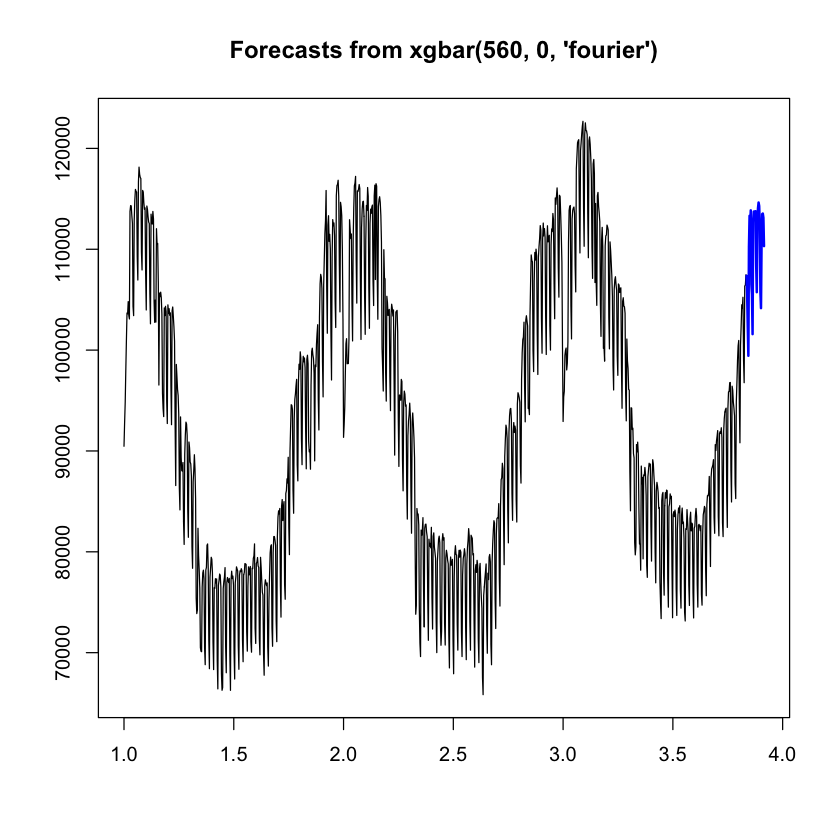

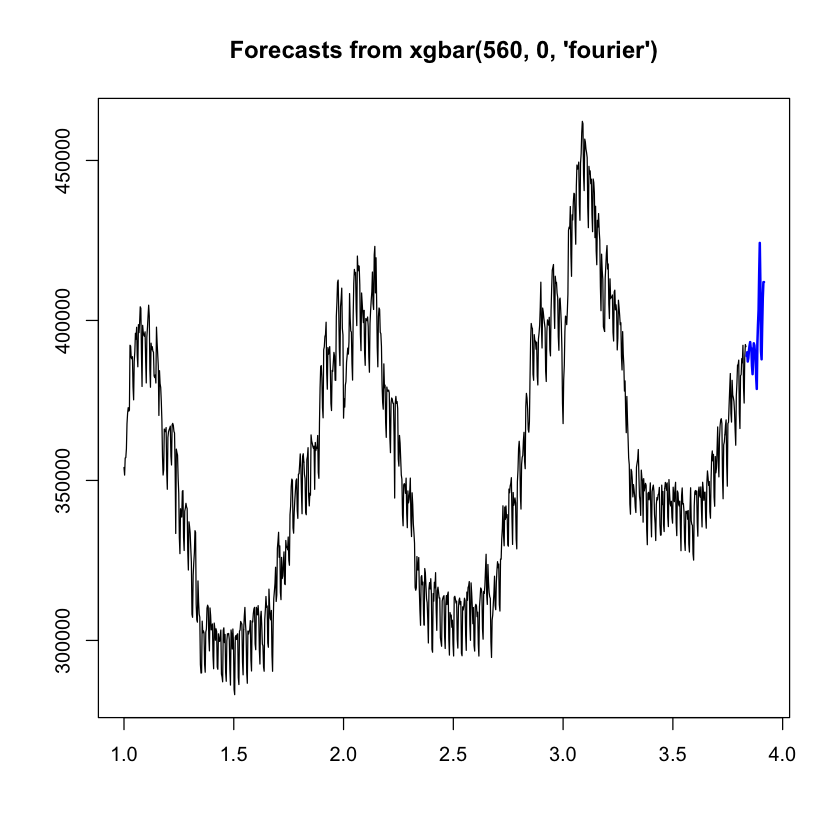

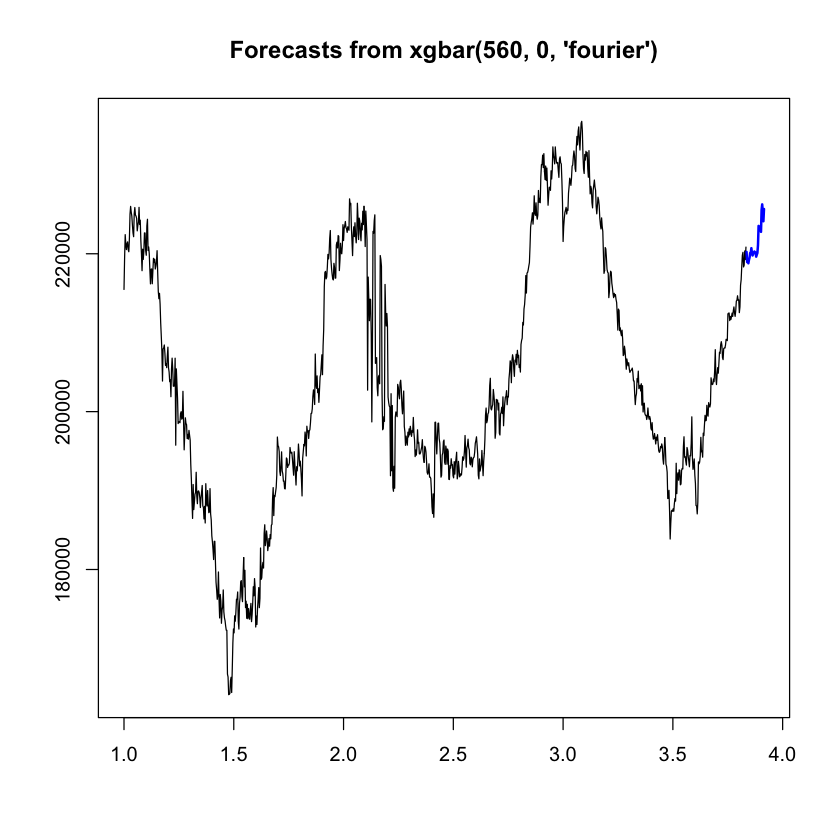

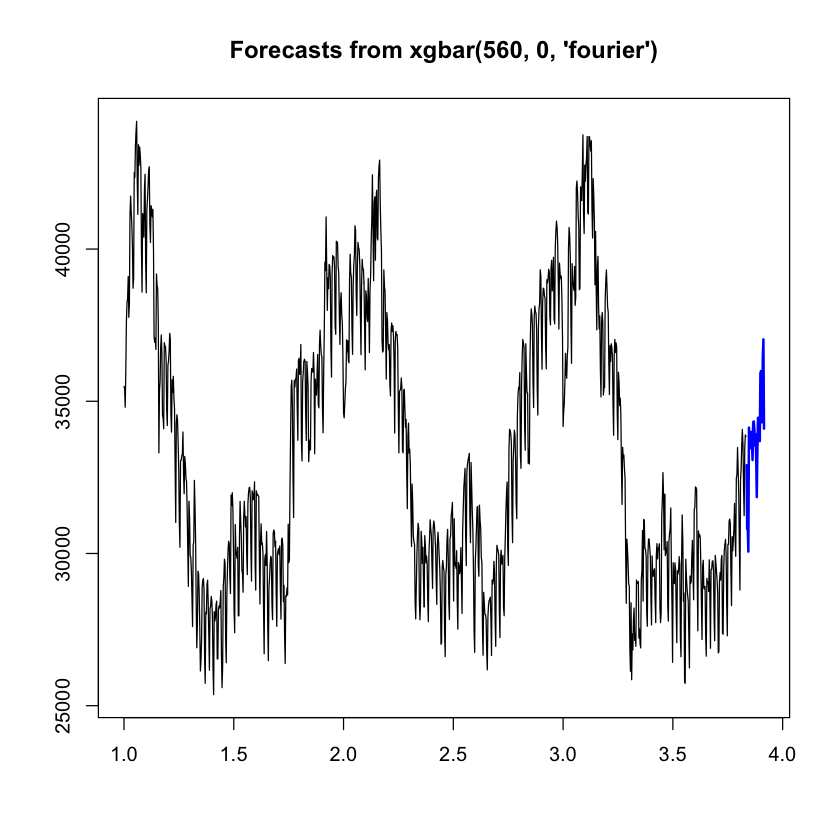

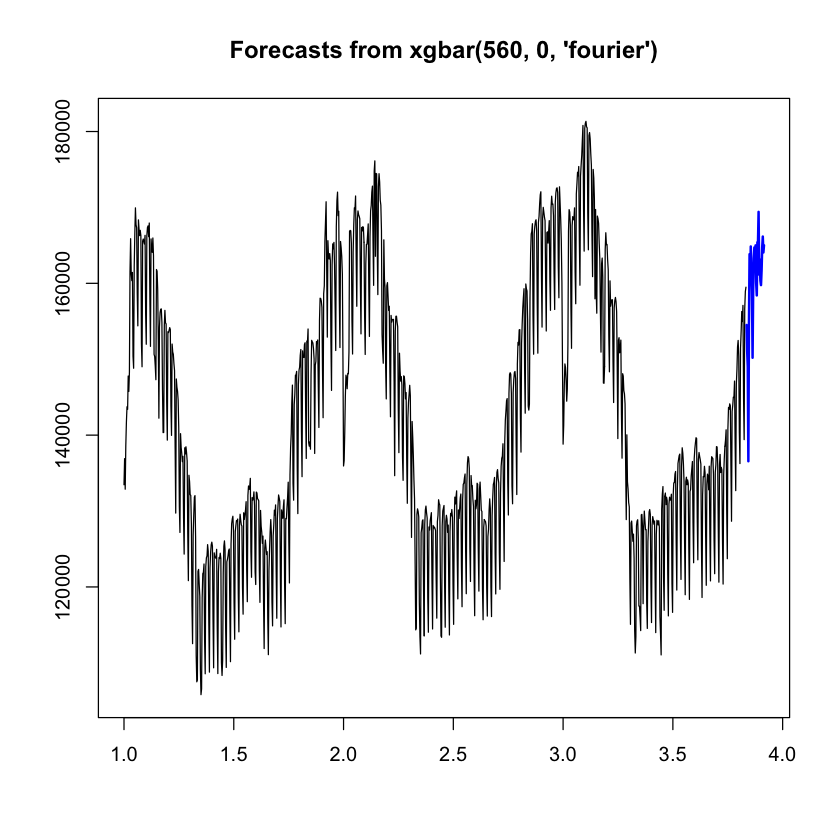

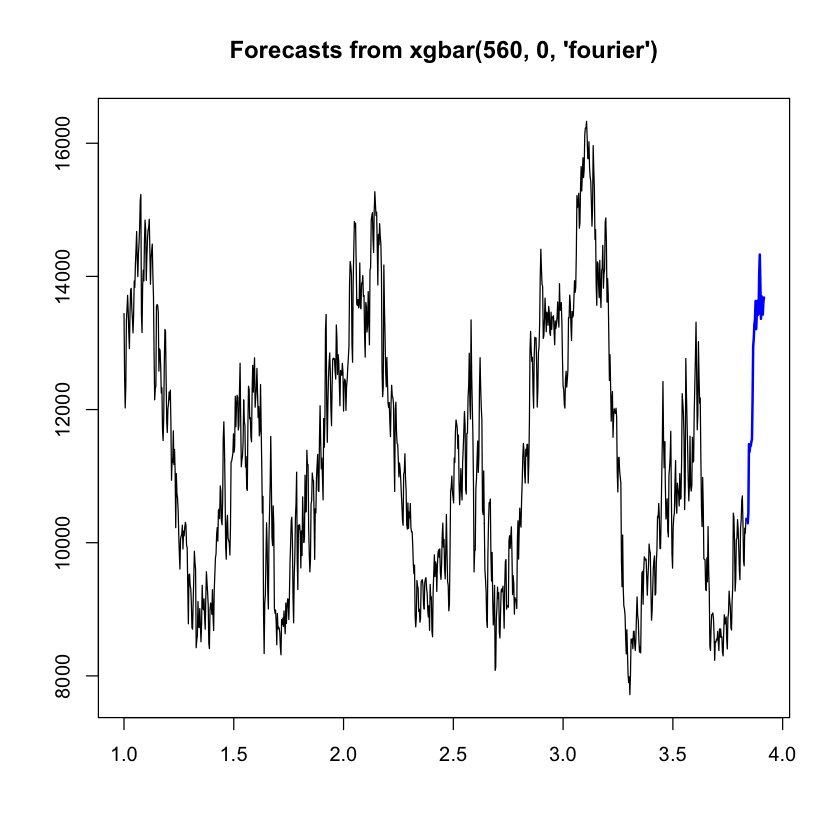

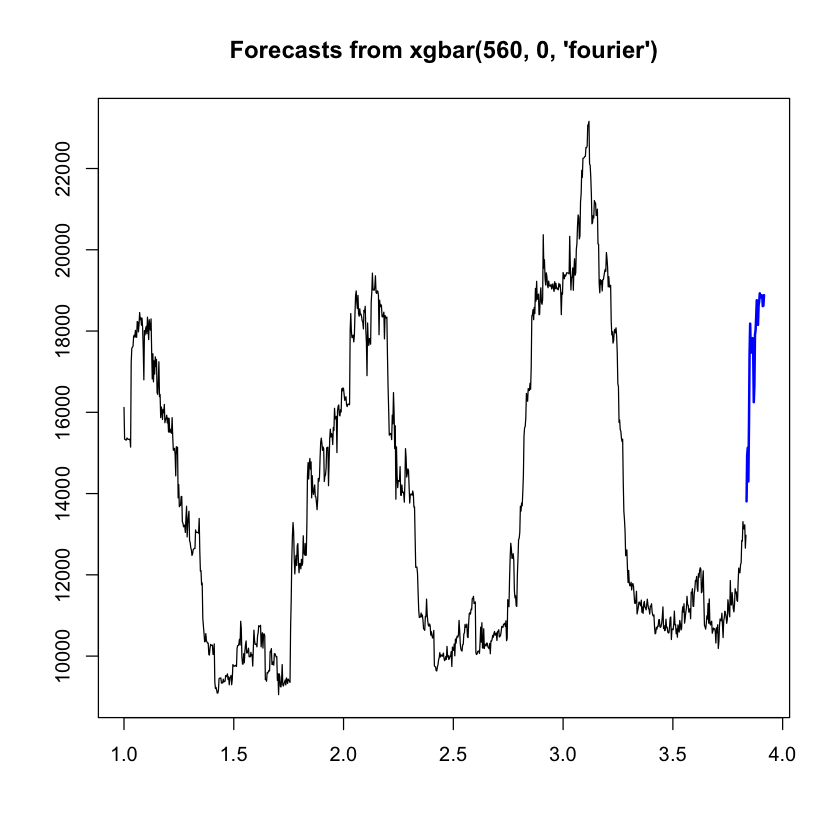

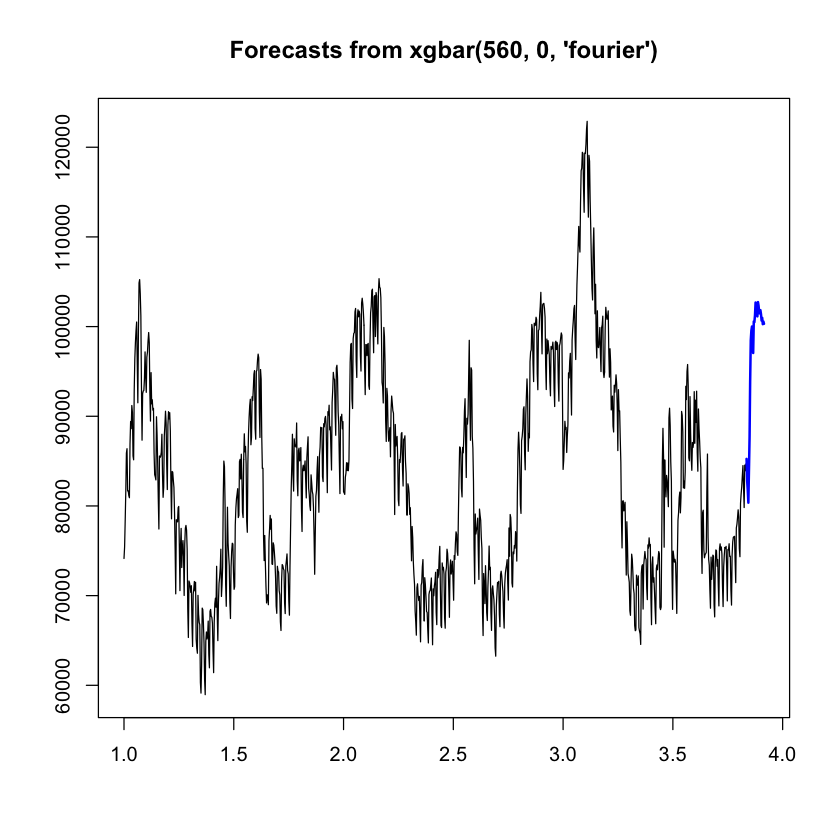

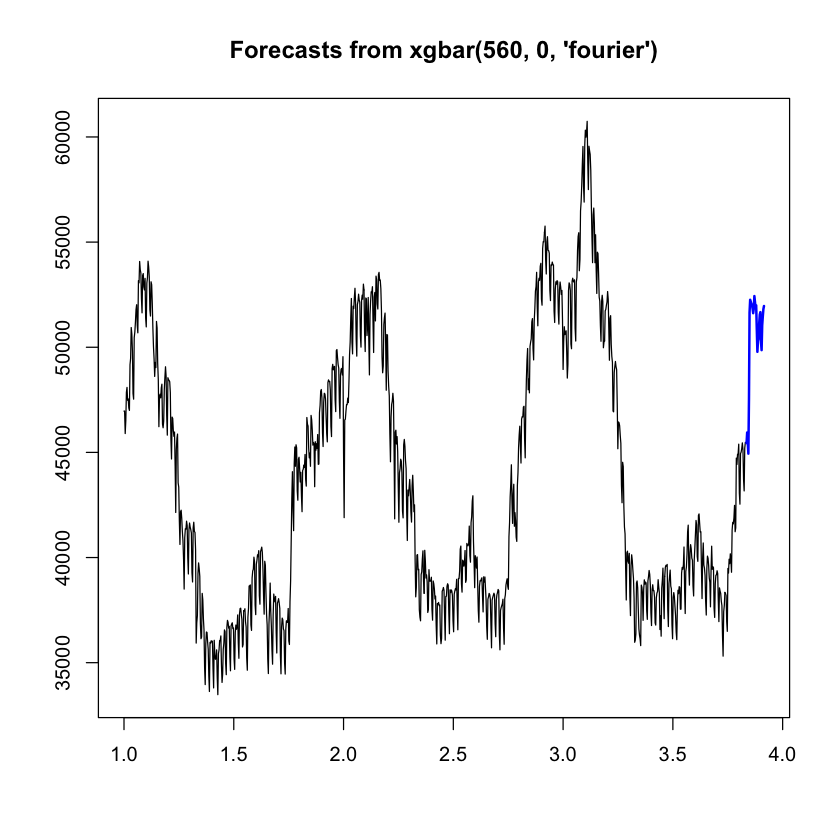

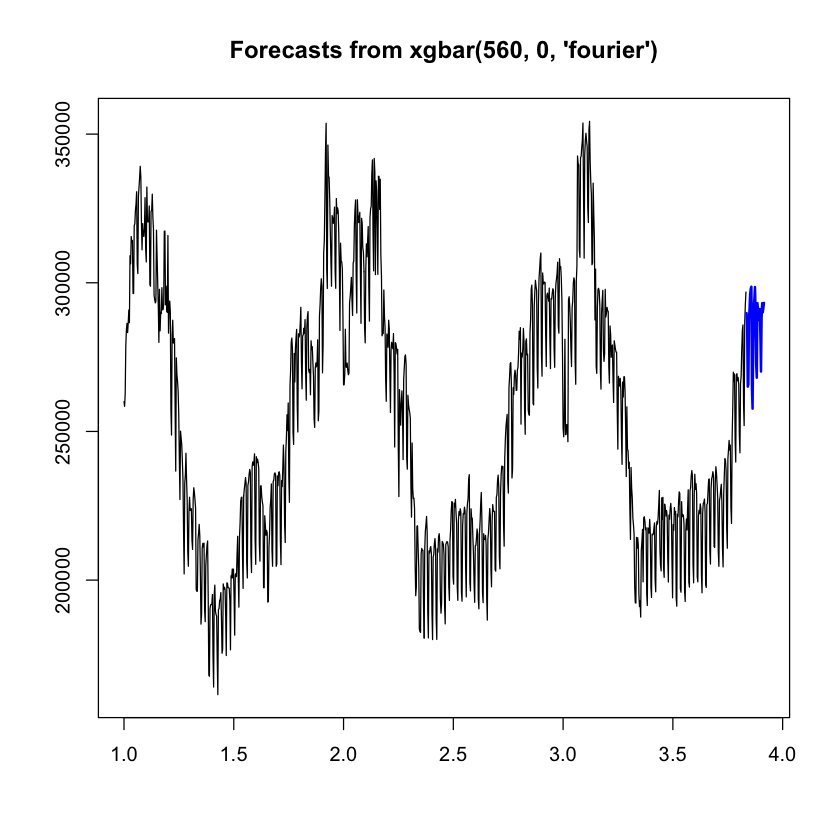

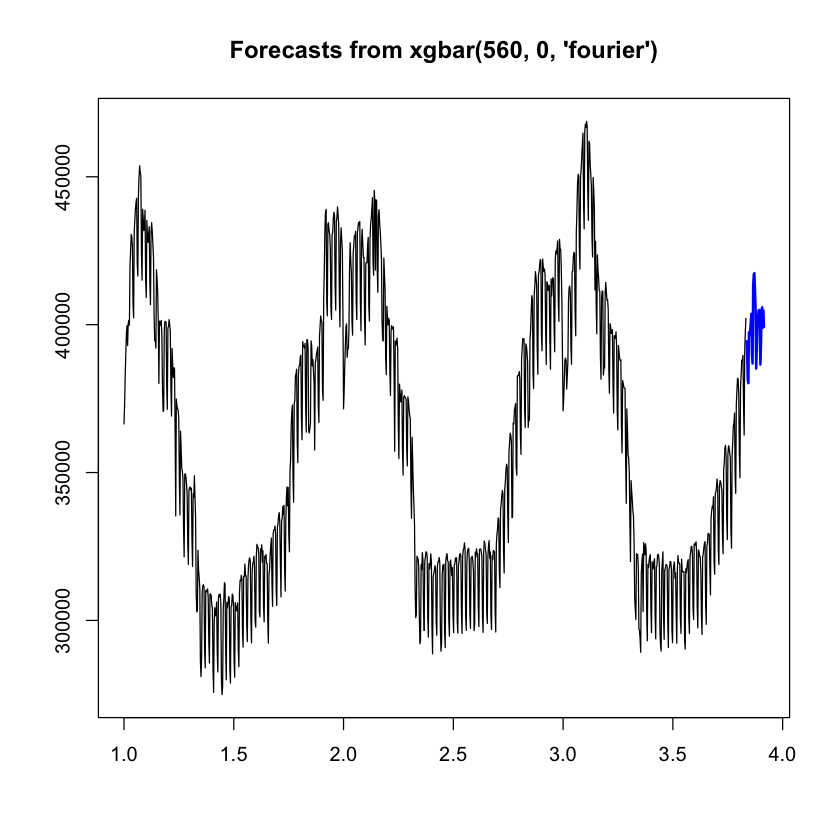

In [ ]:
for(i in c(1:11)) {
    chitiri <- data[which(data$tsID == i),]

    chitiri.msts <- msts(chitiri$Value, seasonal.periods=c(7,365.25))
    model2 <- xgbar(head(chitiri.msts, length(chitiri$Value) - 30), seas_method='fourier', K=100, maxlag=560,
                    xreg=data.matrix(head(chitiri$Temp, length(chitiri$Value) - 30)))#, trend_method='differencing')
    
    preds <- forecast(model2, xreg=data.matrix(tail(tail(chitiri$Temp, 60), 30)))#, lambda=lambdaOpt)

    # accuracy(preds, testSeries)

    plot(preds)
    
    write.csv(preds, paste('/Users/semenfedotov/Desktop/GitHub/ML_MIPT_PART_2/pred', toString(i), '.csv', sep=''))
}

In [9]:
1

[1] 1

In [ ]:
length(chitiri$Value)

In [332]:
trainSeries <- head(chitiri.msts, length(chitiri$Value) - 60)
testSeries <- head(tail(chitiri.msts, 60), 30)

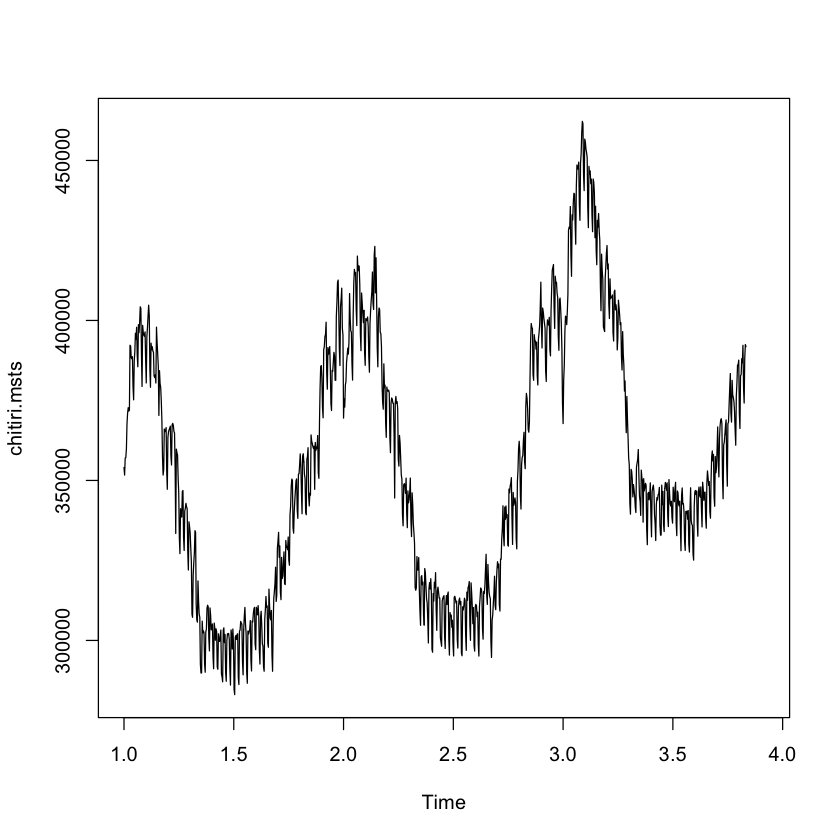

In [294]:
plot(chitiri.msts)

In [239]:
# trainSeries <- head(chitiri.temp, 1035)
# testSeries <- tail(chitiri.temp, 30)

# Scores
1) 12,365 -> 2.916

In [326]:
1

[1] 1

In [333]:
model <- xgbar(head(chitiri.msts, length(chitiri$Value) - 60), seas_method='fourier', K=50, maxlag=205, xreg=data.matrix(head(chitiri$Temp, length(chitiri$Value) - 60)))#, trend_method='differencing')

In [ ]:
# model2 <- xgbar(head(chitiri.msts, length(chitiri$Value) - 30), seas_method='fourier', K=100, maxlag=445, xreg=data.matrix(head(chitiri$Temp, length(chitiri$Value) - 30)))#, trend_method='differencing')

In [256]:
help(xgbar)

In [334]:
1

[1] 1

In [299]:
data

[1] 1

In [301]:
final_preds_2 <- preds

In [303]:
final_preds_2$mean

Time Series:
Start = c(3, 306) 
End = c(3, 335) 
Frequency = 365 
 [1] 385687.5 385657.6 384074.0 383796.3 387001.0 391176.4 388882.5 386030.9
 [9] 387332.9 386192.6 388943.6 394187.2 391869.7 387394.4 387598.8 383309.1
[17] 387105.5 385066.4 392667.2 387103.8 387410.9 386189.3 387803.6 386411.8
[25] 388609.2 389419.6 386243.2 387545.9 388672.4 388434.9

In [328]:
write.csv(preds, '/Users/semenfedotov/Desktop/GitHub/ML_MIPT_PART_2/pred9.csv')

In [335]:
# preds <- forecast(model2, xreg=data.matrix(tail(tail(chitiri$Temp, 60), 30)))#, lambda=lambdaOpt)

# # accuracy(preds, testSeries)

# plot(preds)
# lines(testSeries, col='red')

In [296]:
2

[1] 2

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.3778872,119.1267,90.09355,-0.000878711,0.09534217,0.01894934,-0.1994765,NA
Test set,392.9700521,2709.3056,2316.93099,0.331360506,2.32507834,0.48731913,0.2975493,0.5961881


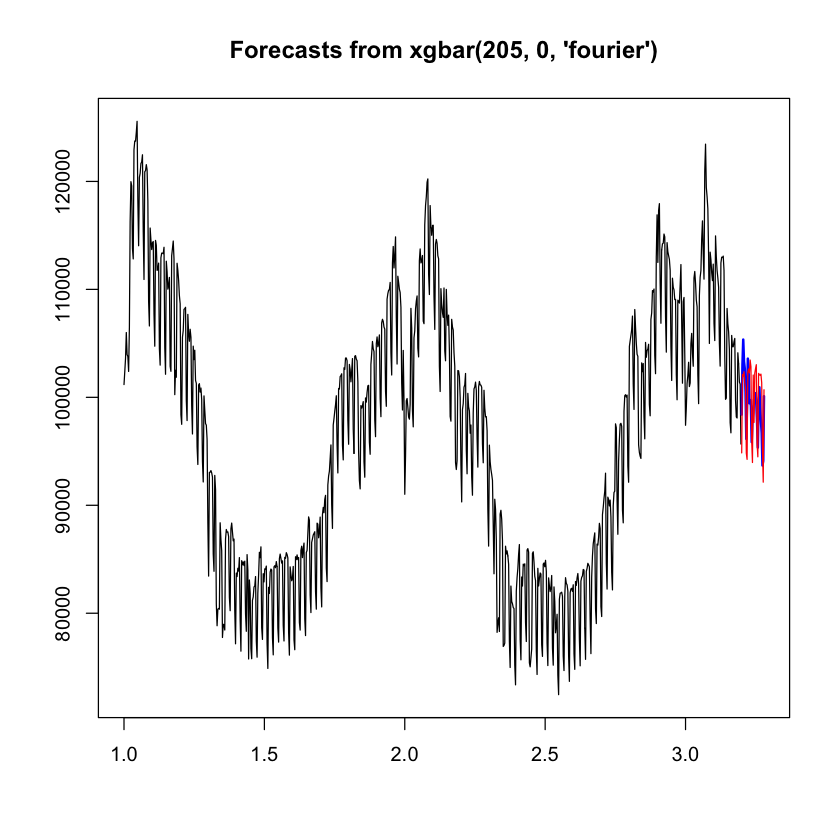

In [336]:
preds <- forecast(model, xreg=data.matrix(head(tail(chitiri$Temp, 60), 30)))#, lambda=lambdaOpt)

accuracy(preds, testSeries)

plot(preds)
lines(testSeries, col='red')

In [245]:
preds1_12_365 <- preds

In [246]:
preds1_12_365

       Point Forecast
3.7534       95955.89
3.7562      101455.76
3.7589      102776.50
3.7616      100049.61
3.7644       91149.95
3.7671       84878.54
3.7699       95124.49
3.7726      100731.09
3.7753      100817.29
3.7781      100639.66
3.7808       99967.79
3.7836       91743.30
3.7863       84015.79
3.7890       96933.17
3.7918      102311.12
3.7945      102221.09
3.7973      102335.34
3.8000      101961.95
3.8027       92278.88
3.8055       86661.25
3.8082       96604.95
3.8110      101035.44
3.8137      101774.12
3.8164      104759.98
3.8192      103629.30
3.8219       99173.59
3.8247       95847.01
3.8274      107109.62
3.8301      107095.50
3.8329      105766.09

In [243]:
1

[1] 1

In [250]:
help(xgbar)

In [ ]:
trend_method='differencing')

In [ ]:
1

In [222]:
lambdaOpt <- BoxCox.lambda(trainSeries)

In [223]:
lambdaOpt

[1] -0.9999242

In [120]:
trainSeries

Time Series:
Start = c(1, 1) 
End = c(3, 133) 
Frequency = 365 
  [1] 407219 412267 420959 424585 427599 427676 418701 429843 462582 472702
 [11] 476529 453350 446861 477438 481413 479765 479268 479163 462372 453828
 [21] 483882 485221 490062 489457 487950 466810 460758 490465 488228 486063
 [31] 479285 475940 450866 443425 471316 470179 466788 465420 463393 444027
 [41] 435429 465482 466464 463220 463368 463534 442382 435549 467922 470406
 [51] 473533 474343 471719 447696 443457 469680 468648 465410 458487 459019
 [61] 434698 429746 455413 458559 455303 453329 424936 427849 427641 455764
 [71] 455805 457096 454127 452861 424998 420078 449639 452497 453488 454660
 [81] 455451 431567 422405 455259 455508 456311 453303 451081 428881 415397
 [91] 442332 441006 436592 428568 425218 405987 398013 425943 425857 424108
[101] 422025 419045 400594 389345 414439 409165 402768 399141 393739 371599
[111] 362396 391971 392624 397634 391241 391361 369917 362904 388182 381479
[121] 348705 348679 3474

In [225]:
# model <- xgbar(head(chitiri.msts, length(chitiri$Value) - 30), seas_method='fourier', K=12, maxlag=365, xreg=data.matrix(head(chitiri$Temp, length(chitiri$Value) - 30)))#, trend_method='differencing')

In [226]:
lambdaOpt

[1] -0.9999242

In [227]:
1

[1] 1

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.3855957,146.833,113.6119,-0.0003819066,0.0317317,0.00534186,-0.2694020,NA
Test set,-2337.1093750,15987.562,14561.3156,-0.5920540325,3.8368639,0.68465134,0.8886309,2.017428


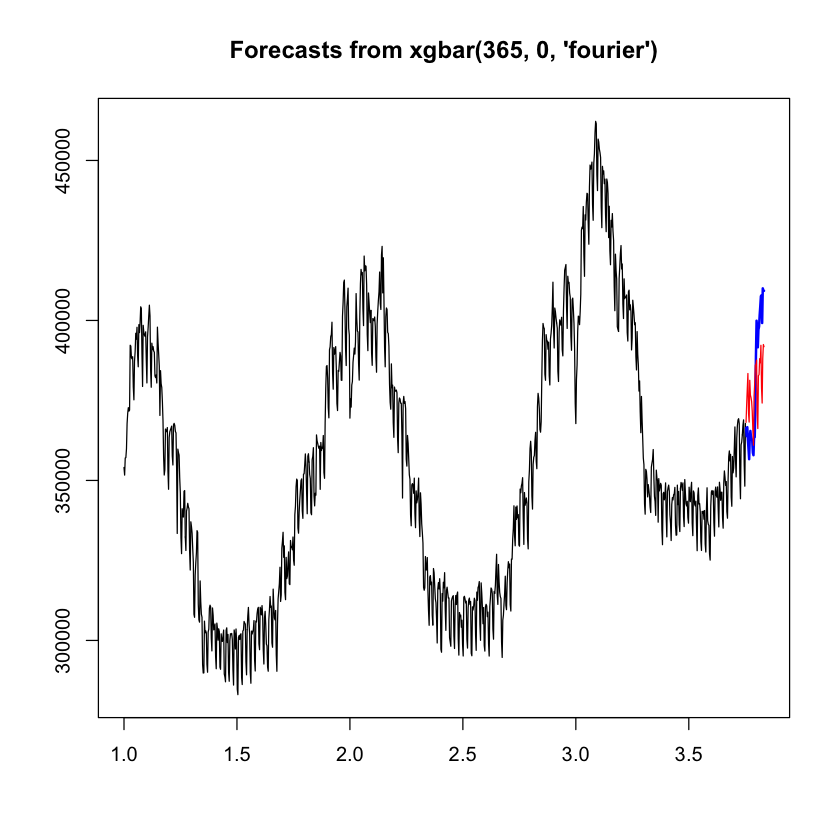

In [298]:
preds <- forecast(model, xreg=data.matrix(head(tail(chitiri$Temp, 60), 30)))#, lambda=lambdaOpt)

accuracy(preds, testSeries)

plot(preds)
lines(testSeries, col='red')

In [128]:
preds

     Point Forecast
3010       30077.00
3011       29583.95
3012       28419.40
3013       29407.71
3014       30402.60
3015       30730.88
3016       30472.54
3017       30608.78
3018       30315.44
3019       28988.41
3020       29318.74
3021       29245.19
3022       28972.82
3023       28886.47
3024       28941.08
3025       28916.03
3026       28601.88
3027       28760.79
3028       28756.29
3029       28941.59
3030       29347.72
3031       29658.85
3032       29960.97
3033       30030.25
3034       29945.17
3035       30007.29
3036       30106.62
3037       29987.19
3038       29957.79
3039       29874.32
3040       30032.33
3041       30032.33
3042       29830.12
3043       30032.33
3044       30032.33
3045       29789.41
3046       29767.56
3047       29767.56
3048       29524.64
3049       29767.56
3050       29767.56
3051       29635.14
3052       29635.14
3053       29609.55
3054       29609.55
3055       29609.55
3056       29609.55
3057       29609.55
3058       29609.55


In [6]:
auto.arima(y = )

ERROR: Error in as.ts(x): аргумент "y" пропущен, умолчаний нет


In [7]:
year('2010-02-10')

[1] 2010

In [8]:
help(as.yearmon)

In [9]:
data$tsID[1]

[1] 4

In [10]:
help(ts)

In [11]:
data$Date[c(1:30)]

[1] "01.01.2010" "02.01.2010" "03.01.2010" "04.01.2010" "05.01.2010"
 [6] "06.01.2010" "07.01.2010" "08.01.2010" "09.01.2010" "10.01.2010"
[11] "11.01.2010" "12.01.2010" "13.01.2010" "14.01.2010" "15.01.2010"
[16] "16.01.2010" "17.01.2010" "18.01.2010" "19.01.2010" "20.01.2010"
[21] "21.01.2010" "22.01.2010" "23.01.2010" "24.01.2010" "25.01.2010"
[26] "26.01.2010" "27.01.2010" "28.01.2010" "29.01.2010" "30.01.2010"

In [12]:
help(ts)

In [13]:
as.numeric(c(format(data$Date[1], "%Y"),
                                                      
             format(data$Date[1], "%m"),
             format(data$Date[1], "%d")))

ERROR: Error in format.default(data$Date[1], "%Y"): неправильный аргумент 'trim'


In [34]:
data$Value <- as.numeric(data$ACTUAL)
data$Date <- as.Date(data$Date, format='%d.%m.%Y')
data$Temp <- as.numeric(data$Temp)
tSeries <- ts(data = data$Value, start=c(year(data$Date[1]), yday(data$Date[1])), freq = 365.25)

In [73]:
chitiri <- data[which(data$tsID == 1),]

tail(chitiri, 35)

chitiri.msts <- msts(chitiri$Value, seasonal.periods=c(7,365.25))

In [11]:
help(ts)

In [12]:
chitiri.temp <- ts(chitiri$Temp, frequency=12)

In [99]:
help(tbats)

In [106]:
bezt <- auto.arima(chitiri.msts)

In [158]:
lambdaOpt = 1.99992424816297

In [157]:
BoxCox.lambda(chitiri.msts)

[1] 1.999924

In [107]:
bezt

Series: chitiri.msts 
ARIMA(3,1,5) 

Coefficients:
          ar1      ar2     ar3      ma1      ma2     ma3      ma4      ma5
      -0.1200  -0.1785  -0.492  -0.0057  -0.0516  0.5103  -0.4155  -0.2729
s.e.   0.1305   0.0712   0.073   0.1331   0.0786  0.0503   0.0358   0.0696

sigma^2 estimated as 1285229:  log likelihood=-8751.11
AIC=17520.21   AICc=17520.38   BIC=17564.94

In [98]:
fit <- tbats(chitiri.msts)
fc <- forecast(fit)
plot(fc)

Warning message in tbats(chitiri.msts):
“Missing values encountered. Using longest contiguous portion of time series”

ERROR: Error in tbats(chitiri.msts): указаны неправильные параметры временного ряда


In [83]:
chitiri.ts <- ts(data = chitiri$Value, start=as.numeric(c(year(chitiri$Date[1]), yday(chitiri$Date[1]))), freq = 365.25)

In [70]:
# chitiri.ts <- ts(data = chitiri$Value, start = as.numeric(c(format(chitiri$Date[1], "%Y"),
                                                      
#                                                           format(chitiri$Date[1], "%m"),
#                                                            format(chitiri$Date[1], "%d"))), freq = 1)

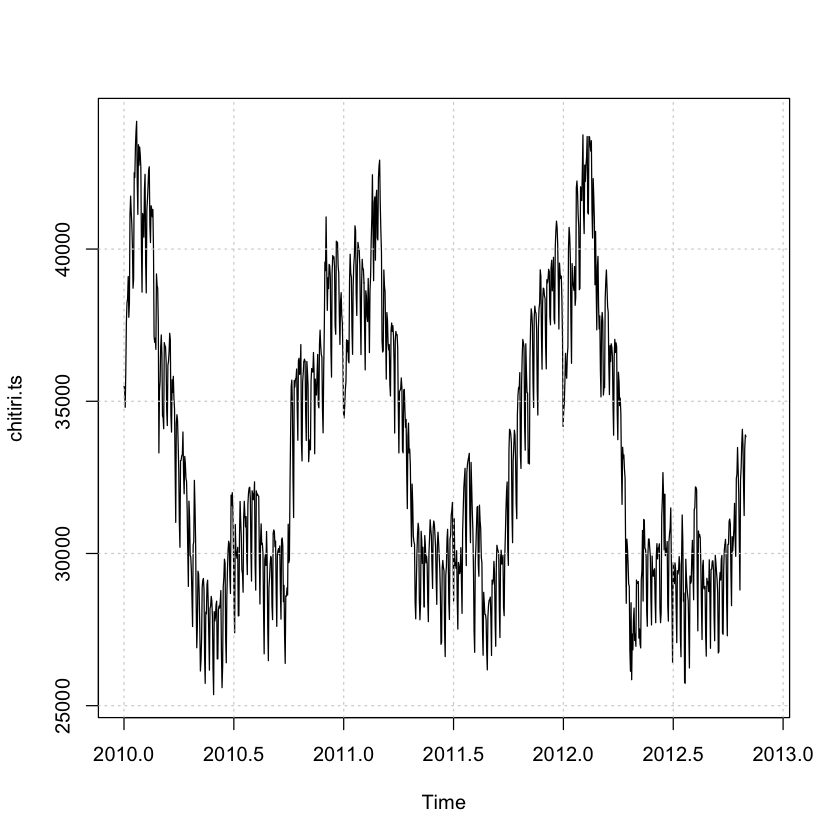

In [84]:
plot(chitiri.ts, type='l')
grid()

In [85]:
LambdaOpt <- BoxCox.lambda(chitiri.ts)

In [86]:
LambdaOpt

[1] 1.999924

In [87]:
help(auto.arima)

In [88]:
boxCoxed <- BoxCox(chitiri.ts, LambdaOpt)

In [89]:
help(forecast)

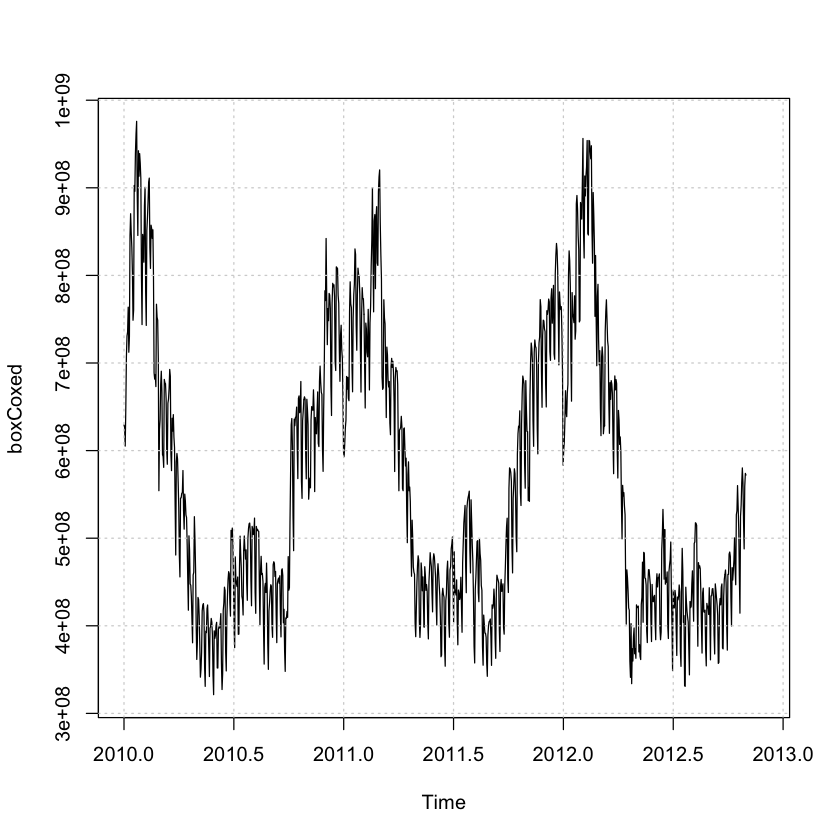

In [90]:
plot(boxCoxed, type='l')
grid()

In [91]:
c(1, c(2,3))

[1] 1 2 3

In [92]:
help(auto.arima)

In [93]:
d=1, D=1, max.p=5, max.q=1, max.P = 0, max.Q = 2, max.order = 10, lambda=LambdaOpt, stepwise=F

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: неожиданный ','
1: d=1,
       ^


In [94]:
LambdaOpt

[1] 1.999924

In [95]:
best_arima <- auto.arima(y=chitiri.ts, lambda=LambdaOpt, xreg=chitiri$Temp)

ERROR: Error in OCSBtest(x, m): The OCSB regression model cannot be estimated


In [48]:
# best_arima <- auto.arima(y=chitiri.ts, d=1, D=1, max.p=10, max.q=10, max.P = 2, max.Q = 2, max.order = 30, lambda=LambdaOpt, stepwise=F, xreg=chitiri$Temp)

In [56]:
summary(best_arima)

Series: chitiri.ts 
Regression with ARIMA(2,0,1) errors 
Box Cox transformation: lambda= 1.147509 

Coefficients:
         ar1     ar2     ma1   intercept       xreg
      0.1877  0.6981  0.8859  137117.909  -246.8778
s.e.  0.0468  0.0463  0.0320    3100.402    88.3723

sigma^2 estimated as 34832451:  log likelihood=-10469.09
AIC=20950.18   AICc=20950.26   BIC=20980

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -5.463566 1287.447 968.7514 -0.1814656 2.970938 0.9832839
                    ACF1
Training set -0.06988447


In [51]:
1

[1] 1

In [52]:
(chitiri$Date[1000])

[1] "2012-09-26"

In [129]:
trainSeries <- window(chitiri.ts, end=c(2012,26,9))
testSeries  <- window(chitiri.ts, start=c(2012,27,9))
D <- 30

ERROR: Error in window.default(x, ...): bad value for 'end'


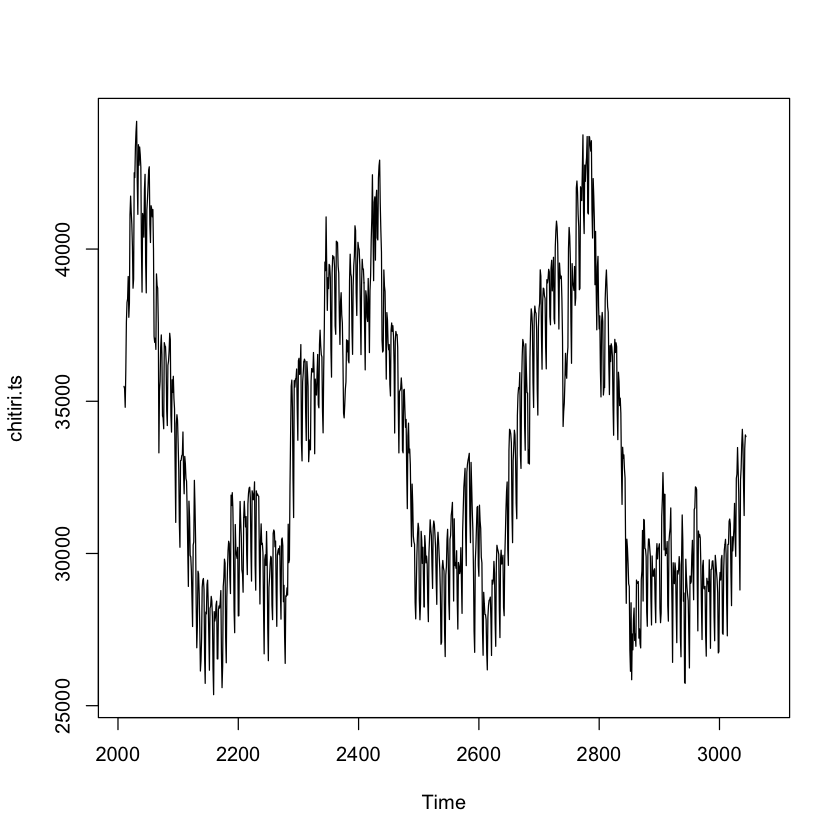

In [53]:
plot(chitiri.ts)

In [159]:
trainSeries <- head(chitiri.msts, 1000)
testSeries <- tail(chitiri.msts, 65)

In [77]:
help(Arima)

In [109]:
modelka <- Arima(y=chitiri.msts, order = c(3, 1, 5), 
                 lambda=LambdaOpt)#, xreg = chitiri$Temp)

In [176]:
help(forecast)

In [111]:
preds <- forecast(modelka, lambda=LambdaOpt, h=65)#, xreg = tail(chitiri$Temp, 65))

Warning message in InvBoxCox(pred$pred, lambda, biasadj, var(residuals(object), :
“biasadj information not found, defaulting to FALSE.”

In [63]:
xname <- "Value"

In [61]:
trainSeries[1000]

[1] 30285.97

In [ ]:
preds_new <- c(trainSeries[1000], preds)

In [55]:
preds

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
3010       30683.87 29511.73 31849.44 28888.47 32463.90
3011       30539.86 28982.76 32085.34 28153.50 32899.00
3012       28471.51 26667.28 30259.02 25704.91 31198.94
3013       28314.22 26331.35 30276.80 25272.80 31308.10
3014       29863.65 27790.86 31915.41 26684.39 32993.64
3015       30321.58 28200.24 32421.24 27067.77 33524.58
3016       30285.38 28113.40 32434.60 26953.64 33563.79
3017       30511.90 28033.62 32960.80 26708.67 34246.25
3018       30280.06 27571.07 32953.71 26121.20 34356.03
3019       28786.99 25925.60 31606.94 24392.11 33084.62
3020       28615.41 25643.19 31542.68 24049.32 33075.97
3021       29841.06 26810.95 32826.37 25186.55 34390.38
3022       30195.70 27128.38 33217.64 25484.03 34800.85
3023       30160.90 27041.50 33233.33 25368.81 34842.71
3024       30384.83 27083.17 33634.29 25311.46 35335.58
3025       30177.09 26713.42 33582.93 24853.20 35365.11
3026       29052.15 25474.21 32566.05 23550.33 3

In [56]:
aa <- preds$mean

In [63]:
cumsumki = cumsum(c(trainSeries[1000], aa))

In [75]:
cumsumki[3]

[1] 91509.7

In [112]:
accuracy(preds, testSeries)

Warning message in window.default(x, ...):
“'start' value not changed”

ERROR: Error in window.default(x, ...): 'start' cannot be after 'end'


Warning message in InvBoxCox(pred$pred, lambda, biasadj, var(residuals(object), :
“biasadj information not found, defaulting to FALSE.”

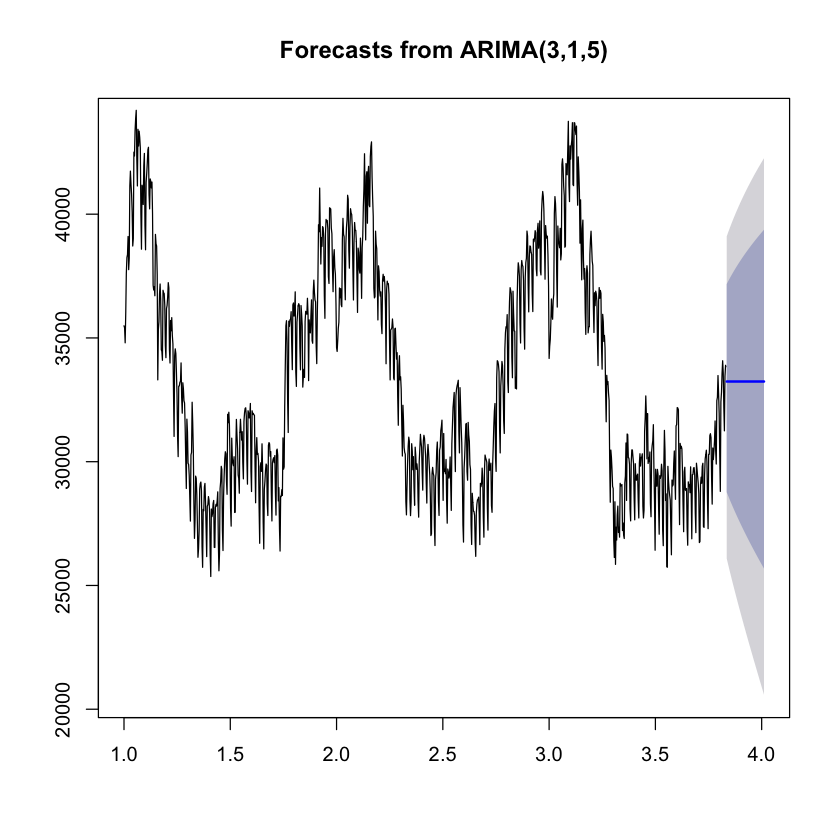

In [114]:
plot(forecast(modelka, h=65, lambda=LambdaOpt))#, xreg = tail(chitiri$Temp, 65)), ylab=xname, xlab="Time")
lines(chitiri.ts, col="red")

In [101]:
kkk <- unique(data$tsID)

In [103]:
sort(kkk)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

In [106]:
1:22

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

In [111]:
for(serie_id in c(1:22)) {
    cur_dataset <- data[which(data$tsID == serie_id),]
    cur_dataset.ts <- ts(data = cur_dataset$Value, start = as.numeric(c(format(cur_dataset$Date[1], "%Y"),
                                                      
                                                          format(cur_dataset$Date[1], "%m"),
                                                           format(cur_dataset$Date[1], "%d"))), freq = 1)
    
    LambdaOpt <- BoxCox.lambda(cur_dataset.ts)
    best_arima <- auto.arima(y=chitiri.ts, lambda=LambdaOpt, xreg=chitiri$Temp)
    
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
